# Leren: Programming assignment 2
** This assignment can be done in teams of 2 **

**Student 1:**  <span style="color:red">de Groot</span> (<span style="color:red">10434410</span>)<br>
**Student 2:** <span style="color:red">Dijkzeul</span> (<span style="color:red">10554386)<br>

-----------------------------------
This notebook provides a template for your programming assignment 2. You may want to use parts of your code from the previous assignment(s) as a starting point for this assignment. 

The code you hand-in should follow the structure from this document. Write down your functions in the cells they belong to. Note that the structure corresponds with the structure from the actual programming assignment. Make sure you read this for the full explanation of what is expected of you. 

**Submission:**

* Make sure your code can be run from top to bottom without errors.
* Include your data files in the zip file.
* Comment your code

One way be sure you code can be run without errors is by quiting iPython completely and then restart iPython and run all cells again (you can do this by going to the menu bar above: Cell > Run all). This way you make sure that no old definitions of functions or values of variables are left (that your program might still be using).

-----------------------------------

If you have any questions ask your teaching assistent. We are here for you.

-----------------------------------

## Multivariate Linear Regression
1) Reading in data

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Read the csv file with pandas
Houses = pd.read_csv('housesRegr.csv', sep=";")

Houses.head()

,MLS,Bedrooms,Bathrooms,Size,Price
0,132842,3,3,2371,795000
1,134364,4,3,2818,399000
2,135141,4,3,3032,545000
3,135712,4,4,3540,909000
4,136282,3,1,1249,109900


2) Gradient function

In [2]:
# Calculate the gradien with resprect to theta.
# Now updated and extended to accept x as a matrix, extended with x^(0) = 1
def gradient(theta, xMatrix, yVector, thetaIndex):
    gradientValue = np.dot((np.dot(theta,xMatrix.T) - yVector), xMatrix.T[thetaIndex])
    
    # no longer needen, shit is vectorized yo
    #gradientValue = 0
    #for i in range(len(yVector)):
    #    gradientValue += (np.dot(theta,xMatrix[i].T) -yVector[i])*xMatrix[i][thetaIndex]
    return gradientValue / len(yVector)


# Moet nog even verbeterd worden zodat het een mooie matrixvermenigvuldiging wordt

3) Parameter updating

In [22]:
# Update all values of theta with learning rate alpha
# Uses the above defined gradientVec function
def update(alpha, theta, xMatrix, yVector):
    tempTheta = [None]*len(theta)
    for i in range(len(theta)):
        tempTheta[i] = theta[i] - alpha*gradient(theta, xMatrix, yVector, i)
    return tempTheta

4) Cost function

In [4]:
# calculates the cost as the squared difference between y and the function of theta
# Now updated and extended to accept x as a matrix, extended with x^(0) = 1
def costFunction(theta, xMatrix, yVector):
    costSum = np.dot(theta,xMatrix.T)-yVector
    costSum = np.dot(costSum,costSum)
    
    # no longer needen, shit is vectorized yo
    #costSum = 0
    #for i in range(len(yVector)):
    #    costSum += (np.dot(theta,xMatrix[i])-yVector[i]) ** 2

    return costSum / (2*len(yVector))

5) Optimization learning rate and iterations

In [5]:
def normalize(xMatrix):
    sizeMax = max(Houses.Size)
    sizeMean = np.mean(Houses.Size)
    bedMax = max(Houses.Bedrooms)
    bedMean = np.mean(Houses.Bedrooms)
    bathMax = max(Houses.Bathrooms)
    bathMean = np.mean(Houses.Bathrooms)
    for i in range(len(xMatrix)):
        xMatrix[i][0] = (xMatrix[i][0]-bedMean)/float(bedMax)
        xMatrix[i][1] = (xMatrix[i][1]-bathMean)/bathMax
        xMatrix[i][2] = (xMatrix[i][2]-sizeMean)/sizeMax
    return xMatrix

Old cost:  133987387645.0
New cost:  32752507775.2


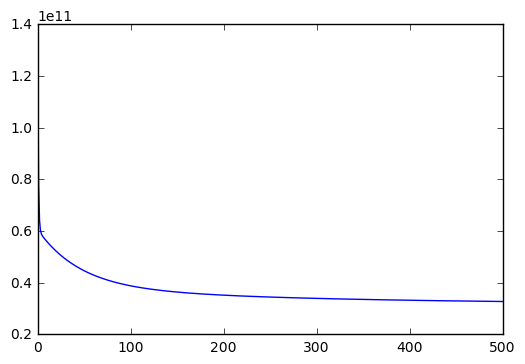

In [68]:
def multiple():
    theta = np.array([100.0,100.0, 100.0,10000.0])
    alpha = 0.5
    iterations = 500
    yVector = Houses.Price
    xMatrix = Houses.as_matrix(columns=['Bedrooms', 'Bathrooms', 'Size']).astype(float)
    xMatrix = normalize(xMatrix)
        
    xMatrix = np.hstack((np.ones((len(xMatrix),1),dtype=np.float),xMatrix))

    cost = [costFunction(theta, xMatrix, yVector)]
    print "Old cost: ", cost[0]
    
    for i in range(iterations):
        theta = update(alpha, theta, xMatrix, yVector)
        cost.append(costFunction(theta, xMatrix, yVector))
    
    print "New cost: ", cost[-1]
    
    x = np.arange(0,len(cost))
    plt.plot(x,cost)
    plt.show()
    
multiple()

**Discussion:**

The start was fairly similar to the previous exercise. Extending the program itself gave not much trouble once we had the linear algebra right.

Some difficulties arose when testing without normalization, because the alpha had to be set quite low. This was, obviously, solved by normalizing the data. Some trials with alpha values and iterations gave the final values


## Polynomial Regression
1) Extension to polynomial regression

In [7]:
def extendMatrix(xMatrix):
    xPowMatrix = np.empty([len(xMatrix), len(xMatrix[0])])
    for i in range(len(xMatrix)):
        xPowMatrix[i] = (np.power(xMatrix[i],2))
    xMatrix = np.hstack((xMatrix,xPowMatrix))
    
    return xMatrix
    

2) Cost function

In [8]:
# calculates the cost as the squared difference between y and the function of theta
# Now updated and extended to accept x as a matrix, extended with x^(0) = 1
def costFunctionPoly(theta, xMatrix, yVector):
    costSum = np.dot(theta,xMatrix.T)-yVector
    costSum = np.dot(costSum,costSum)
    return costSum / (2*len(yVector))

3) Optimization learning rate and iterations

Old cost:  133973587373.0
New cost:  32555067451.6


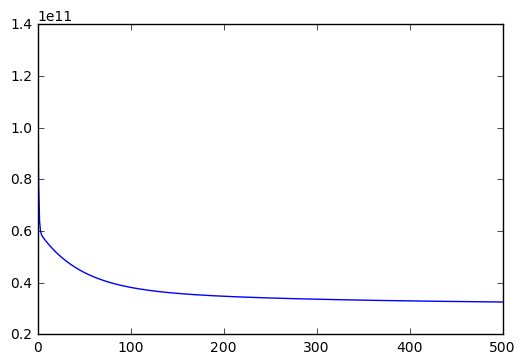

In [67]:
def multiplePoly():
    theta = np.array([100.0,100.0, 100.0,10000.0,100.0,100.0,1000.0])
    alpha = 0.5
    iterations = 500
    yVector = Houses.Price
    xMatrix = Houses.as_matrix(columns=['Bedrooms', 'Bathrooms', 'Size']).astype(float)
    xMatrix = normalize(xMatrix)
    xMatrix = extendMatrix(xMatrix)
    
    xMatrix = np.hstack((np.ones((len(xMatrix),1),dtype=np.float),xMatrix))

    
    cost = [costFunctionPoly(theta, xMatrix, yVector)]
    print "Old cost: ", cost[0]
    
    for i in range(iterations):
        theta = update(alpha, theta, xMatrix, yVector)
        cost.append(costFunction(theta, xMatrix, yVector))
    
    print "New cost: ", cost[-1]
    
    x = np.arange(0,len(cost))
    plt.plot(x,cost)
    plt.show()
    
multiplePoly()

**Discussion:**

This was a very straightforward extension of the previous assignment. No trouble here

-----------------------------------

## Logistic Regression
1) Reading in data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the csv file with pandas
Digits = pd.read_csv('digits123.csv', sep=",", header=None)

Digits.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
1,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
2,0,0,0,2,16,16,2,0,0,0,...,0,0,0,0,2,12,15,4,0,1
3,0,0,0,0,12,5,0,0,0,0,...,0,0,0,0,3,16,8,0,0,1
4,0,0,0,1,11,9,0,0,0,0,...,0,0,0,0,2,14,6,0,0,1


2) Gradient calculating and parameter updating

In [41]:
# uses the sigmoid function to calculate the hypothesis
def hypothesis(theta, xVector):
#     print('hypo')
#     print(1.0/(1.0+math.e **(-np.dot(theta,xVector))))
    return 1.0/(1.0+math.e **(-np.dot(theta,xVector)))

# Gradient function for the logistic regression
def gradientLog(theta,xMatrix,yVector, thetaIndex):
    gradient = (1.0/(1+math.e **(np.dot(theta,xMatrix))))-yVector
    gradient = np.dot(gradient,xMatrix[thetaIndex])
    return gradient/len(yVector)
    
# Update the theta vector for logistic regression
def updateLog(alpha, theta, xMatrix, yVector):
    tempTheta = [None]*len(theta)
    for i in range(len(theta)):
        tempTheta[i] = theta[i] - alpha * gradientLog(theta,xMatrix,yVector,i)
    return tempTheta


3) Cost function

In [12]:
# Calculate the cost for a logistic regrssion function
def costLogFunction(theta, xMatrix, yVector):
    costSum = 0.0
    for i in range(len(yVector)):
        if yVector[i]:
            costSum += math.log(hypothesis(theta,xMatrix[i]))
        else:
            costSum += math.log(1-hypothesis(theta,xMatrix[i]))
            # dit geeft log(0) omdat hypothesis altijd 1 returned
            # dat mag niet
    return -(costSum/len(yVector))
    

4) Pairwise comparison of classess

In [17]:

# split y and multiply theta when multi-class classifying
def splitClasses(theta, yVector):
    classes = list(set(yVector))
    if len(classes) <=2 and 0 in classes:
        return theta, yVector
    else:
        # split y in het aantal klasses
        yMatrix = np.zeros((len(yVector),len(classes)))
        thetaMatrix = np.zeros((len(classes),len(theta)))
        for i in range(len(classes)):
            for j in range(len(yVector)):
                if yVector[j] == classes[i]:
                    yMatrix[j][i] = 1
                else:
                    yMatrix[j][i] = 0
            thetaMatrix[i] = theta
        yMatrix = yMatrix.T
        return thetaMatrix, yMatrix
            

5) Optimization learning rate and iterations

Old costs:  [[0.6983514473972593, 0.6986191595743809, 0.6985090119729033]]


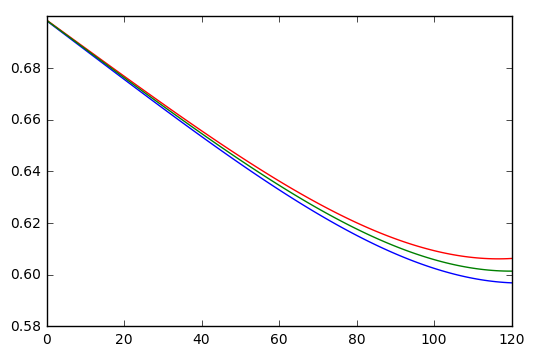

In [64]:
def logreg():

    alpha = 0.00001
    iterations = 120
    yVector = Digits[Digits.columns[-1]]
    xMatrix = np.ones((Digits.columns[-1]+1,len(yVector)))
    theta = np.ones((Digits.columns[-1]+1))*0.0001
    for i in range(1,Digits.columns[-1]):
        xMatrix[i] = Digits[i]
        
    thetaMatrix, yMatrix = splitClasses(theta, yVector)
    
    costs = [[]]
    for i in range(len(yMatrix)):
        costs[0].append(costLogFunction(thetaMatrix[i], xMatrix.T, yMatrix[i]))
    print "Old costs: ", costs
    
    for i in range(iterations):
        costs.append([])
        for j in range(len(yMatrix)):
            thetaMatrix[j] = updateLog(alpha, thetaMatrix[j], xMatrix, yMatrix[j])
            costs[i+1].append(costLogFunction(thetaMatrix[j], xMatrix.T, yMatrix[j]))
    
    costs = np.array(costs).T
    x = np.arange(0,len(costs[0]))
    
    plt.plot(x,costs[0])
    plt.plot(x,costs[1], 'r')
    plt.plot(x,costs[2], 'g')
    plt.show()
    
logreg()

**Discussion:**

The starting value of theta had to be scaled down. Otherwise theta times X would give a too large number resulting in e^-TX becoming close to zero and making the hypothesis function round to 1. This gives an error later on in the cost function. Theta was scaled down by a factor of 1000 to preven this.

Plotting several results show that 120 iterations with an alpha of 0.00001 gives a nice convergence to an optimal set of parameters.


-----------------------------------